In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
"""

In [36]:
# HF dataset taken from:
# https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital

HF_Dataset = 'HFDataset.csv'
HFdata_df = pd.read_csv(HF_Dataset)
HFdata_df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [ ]:
#Use kaggle API to download 

In [37]:
print(HFdata_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [66]:
df_data_bloods_Enviro = HFdata_df[['Sleep', 'Category', 'Smoking', 'Family.History', 'F.History',]]
print(df_data_bloods_Enviro.head(30))


   Sleep Category Smoking Family.History  F.History
0     NO     FREE      NO             NO          0
1     NO     FREE      NO             NO          0
2    YES     FREE      NO             NO          0
3    YES     FREE      NO             NO          0
4     NO     FREE      NO             NO          0
5     NO     FREE      NO             NO          0
6    YES     PAID      NO             NO          0
7     NO     FREE      NO             NO          0
8     NO     FREE      NO             NO          0
9    YES     FREE      NO             NO          0
10   YES     FREE      NO             NO          0
11    NO     FREE      NO             NO          0
12    NO     FREE      NO             NO          0
13   YES     PAID      NO             NO          0
14    NO     FREE      NO             NO          0
15    NO     FREE      NO             NO          0
16   YES     FREE      NO             NO          0
17   YES     FREE      NO             NO          0
18    NO    

In [40]:
# Breakdown table to manageable groups:
    # ID: Age, Age Group, Gender, Locality,
    # PMHx: Depression, Hyperlipidemia, Diabetes, HTN, Allergies, BP, Thrombolysis
    # Enviro: Marital Status, Life Style, Sleep, Category, Smoking, Family History, F.History, 
    # Bloods - Chem: B.Urea, S.Cr, S.Sodium, S.Potassium, S.Chloride, C.P.K, CK.MB, ESR
    
    # Bloods - CBC: WBC, RBC, Hemoglobin, P.C.V, M.C.V, M.C.H, M.C.H.C, PLATELET_COUNT, NEUTROPHIL, LYMPHO, MONOCYTE, EOSINO 
    
    

In [52]:
df_data_bloods_Chem = HFdata_df[['B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium', 'S.Chloride', 'C.P.K', 'CK.MB', 'ESR']]
print(df_data_bloods_Chem.head())


   B.Urea  S.Cr  S.Sodium  S.Potassium  S.Chloride  C.P.K  CK.MB  ESR
0    28.0   0.9       138          3.3         107    130     30   11
1    17.0   0.7       144          4.7         104    163     30   27
2    37.0   1.0       137          4.2         103    149     22   19
3    37.0   1.0       137          4.2         103    149     22   19
4    78.0   1.2       139          4.5         112     75     18   13


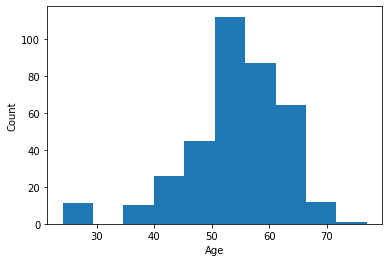

In [41]:
#Plot histogram for Age

_ = plt.hist(HFdata_df['Age'])
_ = plt.xlabel('Age')
_ = plt.ylabel('Count')

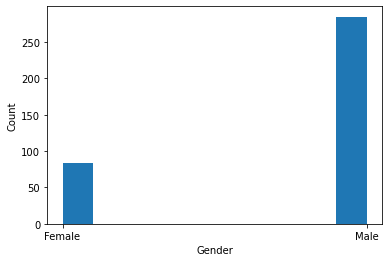

In [42]:
#Plot histogram for gender

_ = plt.hist(HFdata_df['Gender'])
_ = plt.xlabel('Gender')
_ = plt.ylabel('Count')

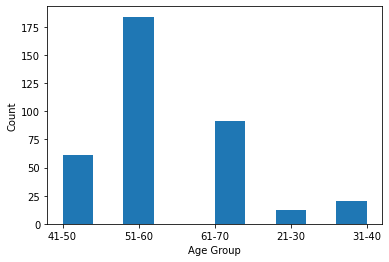

In [43]:
#Plot histogram for Age Group

_ = plt.hist(HFdata_df['Age.Group'])
_ = plt.xlabel('Age Group')
_ = plt.ylabel('Count')

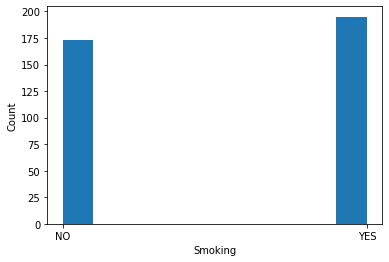

In [44]:
#Plot histogram for Smoking data

_ = plt.hist(HFdata_df['Smoking'])
             #.astype('string'))
_ = plt.xlabel('Smoking')
_ = plt.ylabel('Count')

In [45]:
#Chose variables to use as Feature, use HF as Target variable



In [46]:
# ?? Use Scikit-learn to fit classifier? if needed


In [53]:
# Generate X and y

X = df_data_bloods_Chem
y = HFdata_df["Mortality"]
print(X.shape, y.shape)

(368, 8) (368,)


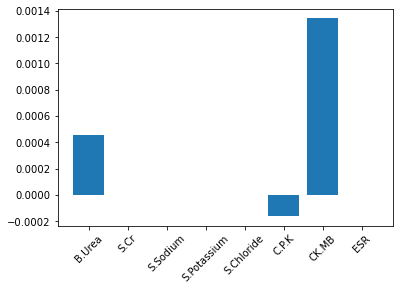

In [60]:
# Run Lasso for feature selection.
from sklearn.linear_model import Lasso

X_lass = X.values
y_lass = y.values
names = df_data_bloods_Chem.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Use ReGex to filter for relevant keywords
Relevant_keywords_CO = pd.list[chest pain, SOB,]
Relevant_keywords_Diagnosis = 
Relevant_keywords_other = 

In [ ]:
for keyword in column
# Create a new column called "CO_contains_chest_pain" to store the search results
    
data['CO_contains_chest_pain'] = data['CO'].str.contains(r'(chest pain|central chest pain)', flags=re.IGNORECASE, regex=True)

# Filter the DataFrame to show only the rows where "Chest Pain" is found in the "CO" column
filtered_data = data[data['CO_contains_chest_pain']]


In [82]:
print(HFdata_df["Diagnosis"].unique())

['EXT. ACUTE WALL M.I' 'A/W M.I' 'AC I/W M.I (RV) RE. M.I ' 'I/W M.I'
 'ACS, NSTEMI' 'AC I/W M.I' 'A/S WALL M.I' 'INF WALL M.I'
 'POSTERIOR WALL M.I' 'Inf. Wall M.I' 'Acute I/W M.I'
 'Ac I/P M.Iwith RV Infarct' 'ACUTE I/W M.I' 'M.I ,ACS' 'STEMI'
 'AC. WALL M.I' 'A/C, A/W M.I' 'CARDIOGENIC SHOCK' 'NSTEM.I' 'I/P M.I'
 'SEVERE MR, MVR' 'Ext. Ant wall M.I' 'old I/W M.I, ACS.'
 'A LATERAL WALL M.I' 'A/S M.I' 'A/CI/W M.I' 'Acute and Ant Wall MI, ACS.'
 'A/L WALL M.I' 'ST-T ELEVATION POST SK' 'AC. I/W M.I'
 'ACS. ACUTE LEFT WALL M.I' 'Inf wall M.I' 'AC. I/W M.I, SHOCK'
 'AC. A/W M.I' 'Inf wall RE. M.I' 'AC.LBBB' 'AC. A/L M.I']


In [94]:
import numpy as np
Col_unique_list = ["CO", "Diagnosis",]

for name in Col_unique_list:
    unique_content = np.unique(HFdata_df[name])
    print(unique_content)

['CENTRAL Chest pain,' 'Central Chest pain,'
 'Central Chest pain,SOB, Sweating' 'Chest pain 1 hr' 'Chest pain 6 HR'
 'Chest pain for 2 to 3 hr' 'Chest pain from 3 hr' 'Chest pain,'
 'Chest pain, 2 HR' 'Chest pain, 4 HR' 'Chest pain, COLD SWEATING'
 'Chest pain, SOB,' 'Chest pain, SOB,COLD SWEATING' 'Chest pain, SWEATING'
 'Chest pain, SWEATING,VOMITING' 'Chest pain, Sweating, SOB'
 'Chest pain, TIGHTNESS' 'Chest pain, VERTIGO,SWEATING'
 'Chest pain, VOMITING' 'Chest pain,COLD SWEATING, '
 'Chest pain,COLD SWEATING, VOMITING' 'Chest pain,COUGH'
 'Chest pain,NAUSEA, SWELLOWING' 'Chest pain,SOB'
 'Chest pain,SOB, Cold sweating'
 'Chest pain,SOB, HEART SINKING , PALPITATION'
 'Chest pain,SWEATING, NAUSEA' 'Chest pain,Sweating, '
 'Chest pain,VOMITING. SWEATING ' 'Chest pain,VOMITING.,SOB'
 'Chest pain,heart sinking, vomiting'
 'Chest pain,nausea,vertigo,sweating,headache'
 'Chest pain,sweating,vomiting' 'Chest pain,vomiting, sweating'
 'Chest pain4 HR, SWEATING' 'SOB FROM 1 DAY '
 'SOB, D

In [102]:
import numpy as np
Col_unique_list = ["CO", "Diagnosis",]

data = HFdata_df["CO"]

unique_list = list()
unique_items = 0

for item in data:
    if item not in unique_list:
        unique_list.append(item)
        unique_items += 1

print(unique_list)

['Chest pain,', 'Central Chest pain,', 'Chest pain,SOB, Cold sweating', 'CENTRAL Chest pain,', 'SOB FROM 1 DAY ', 'Chest pain, SWEATING', 'Chest pain,SOB', 'Chest pain 1 hr', 'Chest pain, VOMITING', 'Chest pain,heart sinking, vomiting', 'Chest pain,nausea,vertigo,sweating,headache', 'Chest pain, 2 HR', 'Chest pain,NAUSEA, SWELLOWING', 'Chest pain,COLD SWEATING, VOMITING', 'Chest pain,Sweating, ', 'Chest pain,vomiting, sweating', 'SOB, DIZZINESS, CHEST PAIN,NAUSEA,DIAPHORESIS', 'Chest pain, 4 HR', 'Chest pain,SOB, HEART SINKING , PALPITATION', 'Chest pain4 HR, SWEATING', 'Chest pain from 3 hr', 'Central Chest pain,SOB, Sweating', 'Chest pain,sweating,vomiting', 'Chest pain,VOMITING.,SOB', 'Chest pain, Sweating, SOB', 'Chest pain,COLD SWEATING, ', 'Chest pain,COUGH', 'Chest pain for 2 to 3 hr', 'Chest pain,SWEATING, NAUSEA', 'Chest pain, VERTIGO,SWEATING', 'Chest pain, TIGHTNESS', 'Chest pain, SOB,', 'Chest pain,VOMITING. SWEATING ', 'Chest pain, SWEATING,VOMITING', 'Chest pain, SOB,COLD

In [54]:
#Run Split to generate test and train data

#Needed X, y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)








In [56]:
# Run a Ridge regression 

#Needed:
    #X_train, y_train,
    #X_test, y_test,
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    #Do I need to predict on test data??
    #y_pred = ridge.predict(X_test)
    scores = ridge.score(X_test, y_test)
    ridge_scores.append(score)
print(ridge_scores)

NameError: name 'score' is not defined

In [145]:
import pandas as pd
import re
As_ser = HFdata_df["CO"]
As_str = As_ser.astype(str).str
print(type(As_str))
As_lowerc = As_str.lower()

#for keyword in column
# Create a new column called "CO_chest_pain" to store the search results

#HFdata_df['CO_chest_pain'] = re.findall(r'\b\w*[^\w\s]\w*\s?chest\s?pain\w*[^\w\s]\w*\b', As_lowerc)

HFdata_df['CO_chest_pain'] = As_lowerc.str.contains(r'\w*\s?chest\s?pain\w*', regex=True)

print(HFdata_df['CO_chest_pain'].head())
# Filter the DataFrame to show only the rows where "Chest Pain" is found in the "CO" column
#filtered_data = data[data['CO_contains_chest_pain']]


<class 'pandas.core.strings.StringMethods'>
0    True
1    True
2    True
3    True
4    True
Name: CO_chest_pain, dtype: bool
